In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rc('font', family='NanumBarunGothic')

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# CSV 파일이 저장된 폴더 경로
folder_path = '/content/drive/MyDrive/DB프로젝트/data_csv/result_Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
columns_to_read = ['계']

# 해당 폴더 내의 모든 CSV 파일 목록
file_list = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

# 첫 번째 행의 데이터를 저장할 빈 데이터프레임 생성
first_row_data = pd.DataFrame()

file_path = os.path.join(folder_path, file_list[0])
data = pd.read_csv(file_path, usecols=['계'])  # 첫 번째 행만 읽기
data = data.drop(data.index[0])
data = data.drop(data.index[0])
data.columns = ['소비']
data.index = [str(year) for year in range(2015, 2023)]
first_row_data = pd.concat([first_row_data, data], axis=1)

file_path = os.path.join(folder_path, file_list[1])
data = pd.read_csv(file_path, usecols=['총 발전량'])  # 첫 번째 행만 읽기
data.columns = ['발전']
data.index = [str(year) for year in range(2015, 2023)]
first_row_data = pd.concat([first_row_data, data], axis=1)

file_path = os.path.join(folder_path, file_list[2])
data = pd.read_csv(file_path, usecols=['전력거래량 (GWh)'])  # 첫 번째 행만 읽기
data = data.drop(data.index[0])
data = data.drop(data.index[0])
data = data.drop(data.index[0])
data.columns = ['거래']
data.index = [str(year) for year in range(2015, 2023)]
first_row_data = pd.concat([first_row_data, data], axis=1)

file_path = os.path.join(folder_path, file_list[3])
data = pd.read_csv(file_path, usecols=['계'])  # 첫 번째 행만 읽기
data = data.drop(data.index[0])
data = data.drop(data.index[0])
data = data.drop(data.index[0])
data.columns = ['판매']
data.index = [str(year) for year in range(2015, 2023)]
first_row_data = pd.concat([first_row_data, data], axis=1)

# 단위 수정 toe -> MWh
first_row_data['소비'] = first_row_data['소비'] * 11.63

# 단위 수정 GWh -> MWh
first_row_data['거래'] = first_row_data['거래'] * 1000

# 데이터프레임 출력
print(first_row_data)

                소비         발전         거래         판매
2015  1.815072e+09  528091193  495361000  483654816
2016  1.881524e+09  540440854  509234000  497038904
2017  1.898944e+09  553530107  520917000  507746386
2018  1.971992e+09  570646507  537061000  520498738
2019  1.955645e+09  563040305  529851000  509269715
2020  1.801998e+09  552162160  515983000  533430811
2021  1.888217e+09  576809488  537061000  547932742
2022  1.850461e+09  594400365  551380000  547932742


In [12]:
first_row_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2015 to 2022
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소비      8 non-null      float64
 1   발전      8 non-null      int64  
 2   거래      8 non-null      int64  
 3   판매      8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0+ bytes


# **지역별 에너지 판매량**

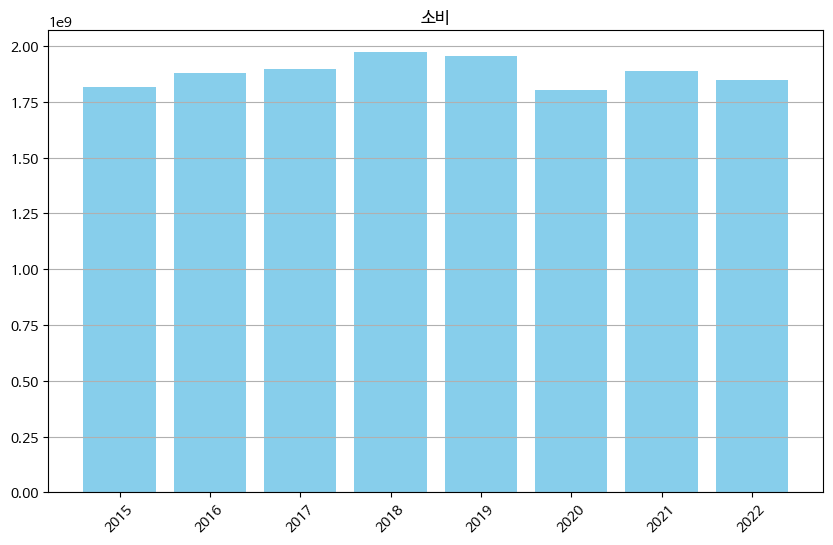

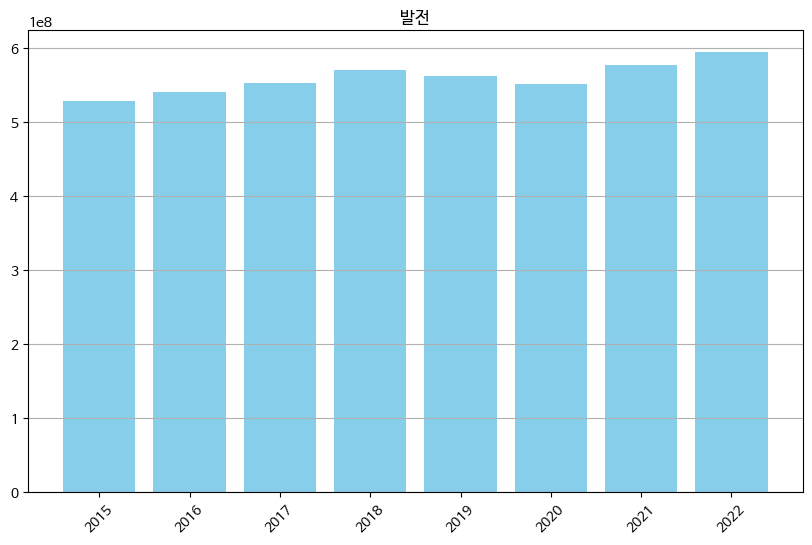

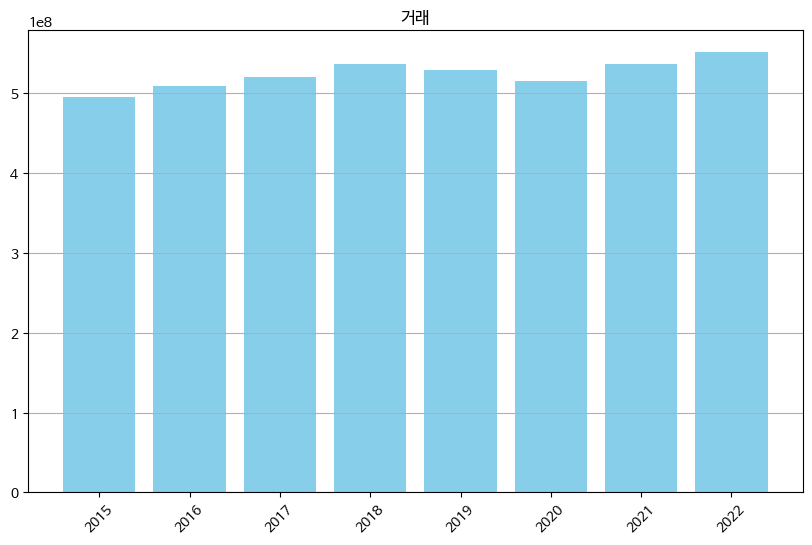

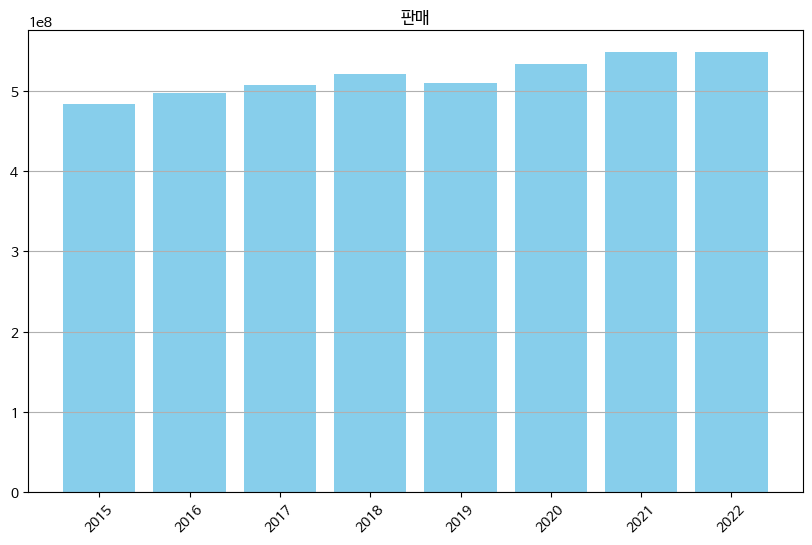

In [13]:
for column in first_row_data.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(first_row_data.index, first_row_data[column], color='skyblue')
    plt.title(column)

    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

#**꺾은선 그래프**

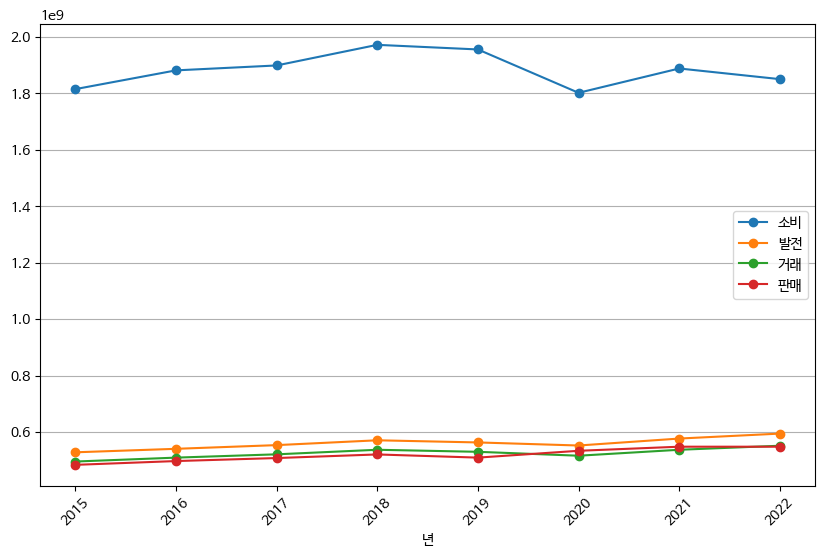

In [14]:
# 'total' 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=[])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.xlabel('년')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()

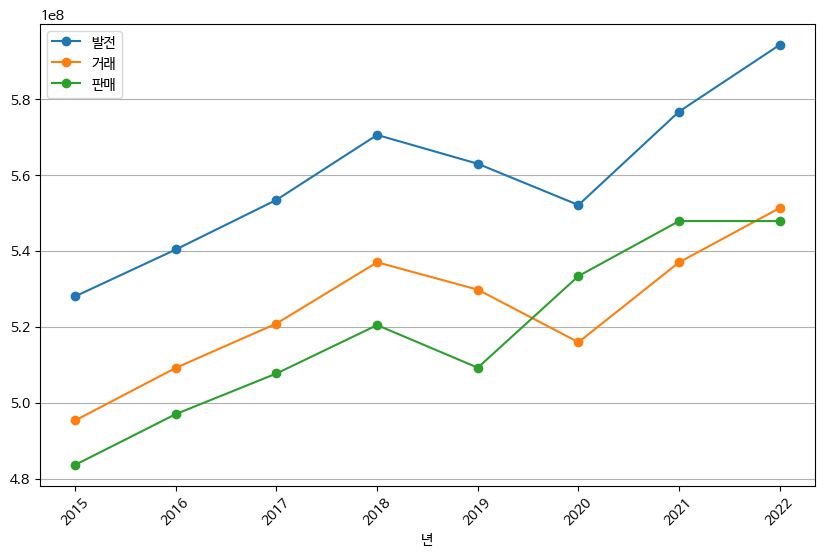

In [15]:
# 'total' 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=['소비'])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.xlabel('년')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()